In [1]:
# train_and_save_xgboost.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from data_preparation import load_and_preprocess_data
import logging
from xgboost_utils import save_pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def main():
    # Load and preprocess data
    logging.info("Loading and preprocessing data...")
    df = load_and_preprocess_data()
    logging.info(f"Data loaded with shape: {df.shape}")
    
    # Prepare features and target
    features_to_drop = [
        "cumulative_milliseconds", "positionOrder", "date", "driverRef", "number", 
        "date_race", "time_race", "time", "forename", "surname", "dob", "url_race", 
        "location", "circuitRef", "milliseconds"  # Removed "milliseconds" from features_to_drop
    ]
    
    X = df.drop(columns=features_to_drop)
    y = df["milliseconds"]
    logging.info(f"Features and target prepared. X shape: {X.shape}, y shape: {y.shape}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    logging.info(f"Data split into train and test sets.")
    logging.info(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    
    # Define categorical and numerical features
    categorical_features = ["code", "nationality", "status", "circuit_type", "country"]
    numerical_features = [col for col in X.columns if col not in categorical_features]
    logging.info(f"Categorical features: {categorical_features}")
    logging.info(f"Numerical features: {numerical_features}")
    
    # Create preprocessing pipeline including ColumnTransformer and PCA
    preprocessor = Pipeline(steps=[
        ('transformer', ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ]
        )),
        ('pca', PCA(n_components=100, random_state=42))
    ])
    
    # Create the full pipeline with preprocessor and XGBoost regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(n_estimators=100, random_state=42))
    ])
    
    # Train the pipeline
    logging.info("Training XGBoost pipeline...")
    pipeline.fit(X_train, y_train)
    logging.info("Training completed.")
    
    # Save the entire pipeline
    model_path = "models/xgboost_pipeline.pkl"
    save_pipeline(pipeline, model_path)
    logging.info(f"XGBoost pipeline saved to {model_path}")
    
    # model performance
    logging.info("Evaluating model performance on test set...")
    y_pred = pipeline.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    logging.info(f"Test RMSE: {rmse:.2f}")
    logging.info(f"Test MAE: {mae:.2f}")
    logging.info(f"Test R²: {r2:.4f}")

if __name__ == "__main__":
    main()


2024-12-01 17:39:28,679 - INFO - Loading and preprocessing data...
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:25: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  practice_sessions = pd.read_csv('../data/raw_data/ff1_laps.csv', na_values=na_values)
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:26: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  tire_data = pd.read_csv('../data/raw_data/ff1_laps.csv', na_values=na_values)


(586171, 15)
(586171, 32)
(586171, 40)
(586171, 45)
(586171, 46)
(586171, 47)
(586171, 47)


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['pitstop_milliseconds'].fillna(0, inplace=True)  # Assuming 0 if no pit stop
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:108: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method

(159538, 56)


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:226: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['Compound'].fillna('UNKNOWN', inplace=True)
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:282: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

Shape of laps before merging weather data: (159538, 65)

Processing race 989 (2018 AUSTRALIAN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 990 (2018 BAHRAIN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 991 (2018 CHINESE GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 992 (2018 AZERBAIJAN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 993 (2018 SPANISH GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 994 (2018 MONACO GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 995 (2018 CANADIAN GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 996 (2018 FRENCH GRAND PRIX)
No weather data found for race - Assigning default weather values

Processing race 997 (2018 AUSTRIAN

/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:385: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps_with_weather['TrackTemp'].fillna(25.0, inplace=True)
/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:386: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

No duplicate rows found after merging weather data.


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation/data_preparation.py:657: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laps['TrackStatus'].fillna(1, inplace=True)  # 1 = regular racing status


Shape before filtering and outlier removal: (159538, 73)
Normal racing laps: (141117, 73)
Special laps (pit stops, safety car, etc.): (18421, 73)
Final shape after outlier removal: (148148, 73)


2024-12-01 17:39:39,746 - INFO - Data loaded with shape: (129727, 59)
2024-12-01 17:39:39,753 - INFO - Features and target prepared. X shape: (129727, 44), y shape: (129727,)
2024-12-01 17:39:39,772 - INFO - Data split into train and test sets.
2024-12-01 17:39:39,772 - INFO - X_train shape: (103781, 44), X_test shape: (25946, 44)
2024-12-01 17:39:39,772 - INFO - Categorical features: ['code', 'nationality', 'status', 'circuit_type', 'country']
2024-12-01 17:39:39,772 - INFO - Numerical features: ['raceId', 'driverId', 'lap', 'position', 'year', 'round', 'circuitId', 'lat', 'lng', 'alt', 'grid', 'statusId', 'pitstop_milliseconds', 'constructorId', 'constructor_points', 'constructor_position', 'constructor_performance', 'circuit_length', 'circuit_type_encoded', 'seconds_from_start', 'TrackStatus', 'tire_compound', 'fp1_median_time', 'fp2_median_time', 'fp3_median_time', 'quali_time', 'is_pit_lap', 'TrackTemp', 'AirTemp', 'Humidity', 'driver_aggression', 'driver_overall_skill', 'driver_c

2024-12-01 17:49:34,344 - INFO - Pipeline loaded from models/xgboost_pipeline.pkl
2024-12-01 17:49:34,344 - INFO - Pipeline loaded from models/xgboost_pipeline.pkl
/var/folders/c3/96l18xtx7fz9rgy3dxg2crdm0000gn/T/ipykernel_704/2644595900.py:44: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  special_laps = pd.read_csv('data/SPECIAL_LAPS.csv', na_values=['\\N', 'NaN', ''])
2024-12-01 17:49:35,352 - INFO - All data files loaded successfully.
2024-12-01 17:49:35,356 - INFO - Numerical features: ['raceId', 'driverId', 'lap', 'position', 'year', 'round', 'circuitId', 'lat', 'lng', 'alt', 'grid', 'statusId', 'pitstop_milliseconds', 'constructorId', 'constructor_points', 'constructor_position', 'constructor_performance', 'circuit_length', 'circuit_type_encoded', 'seconds_from_start', 'TrackStatus', 'tire_compound', 'fp1_median_time', 'fp2_median_time', 'fp3_median_time', 'quali_time', 'is_pit_lap', 'TrackTemp', 

     Lap      Driver       LapTime  Position  static_raceId  static_driverId  \
318    1  Driver 807  85646.429688         1           1119              807   
954    1  Driver 855  86247.296875         2           1119              855   
212    1    Driver 1  86381.890625         3           1119                1   
53     1  Driver 857  87301.859375         4           1119              857   
583    1  Driver 830  87327.914062         5           1119              830   

     static_lap  static_position static_time  static_milliseconds  ...  \
318          45               15    1:38.535                98535  ...   
954          50               15    1:38.315                98315  ...   
212          50                8    1:35.933                95933  ...   
53           50               10    1:36.128                96128  ...   
583          50                1    1:37.637                97637  ...   

    static_track_position dynamic_tire_age  dynamic_fuel_load  \
318      

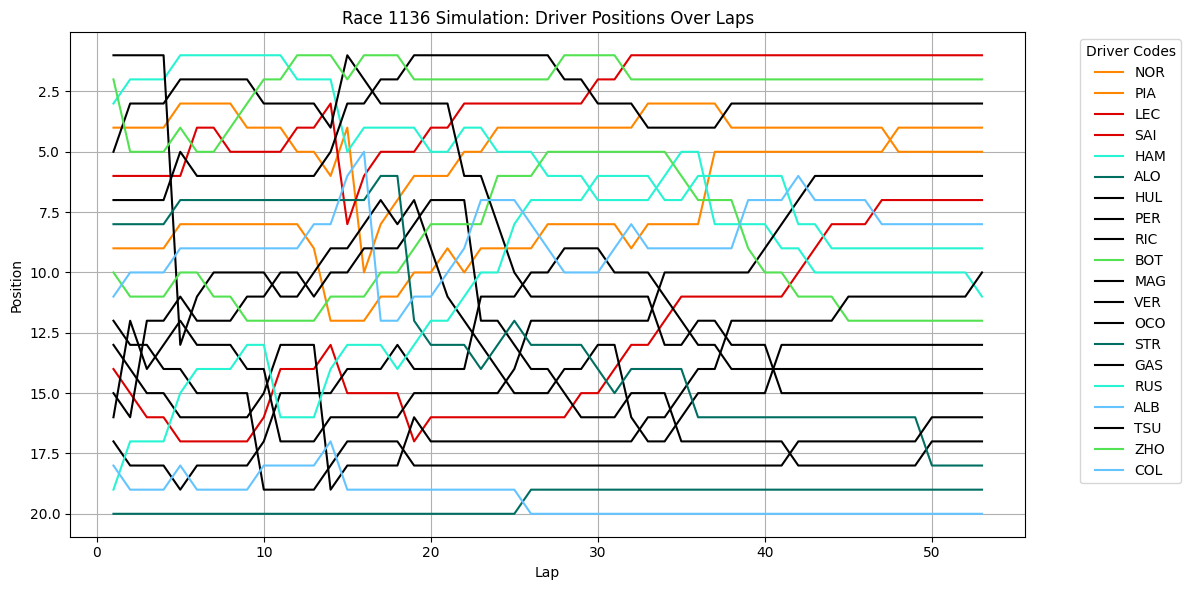

2024-12-01 17:49:38,101 - INFO - Lap times plot saved to driver_lap_times_plot.png


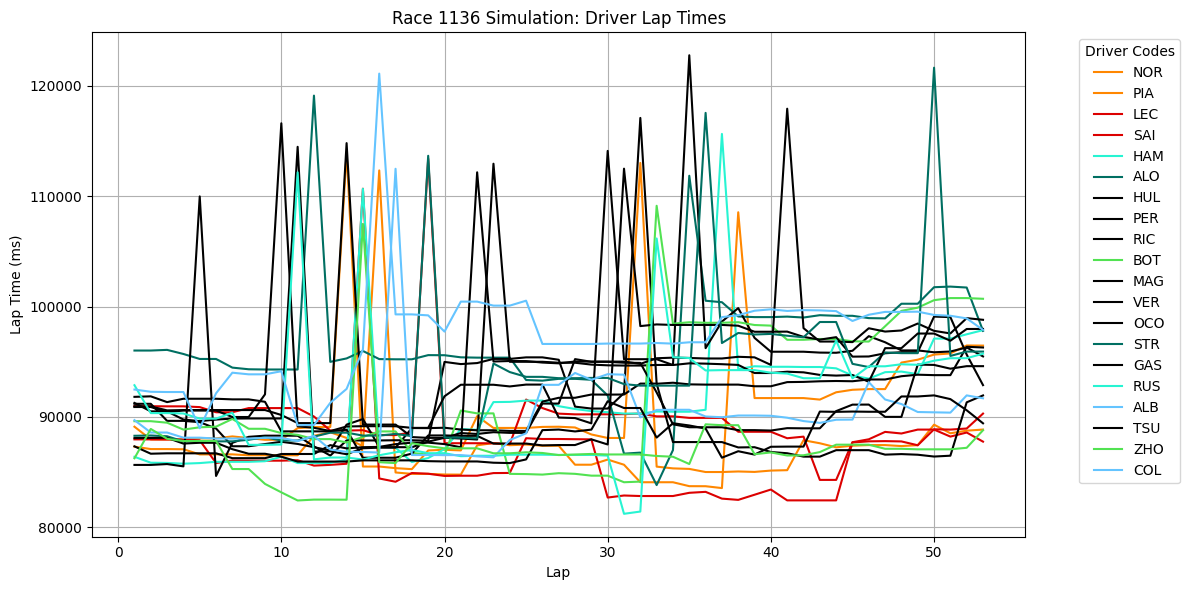

In [4]:
# simulation_with_pit_and_safety_car_strategy.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from typing import List, Tuple, Dict
from race_simulator_xgboost import (
    Race, Driver, RaceSimulator, plot_race_positions, plot_lap_times, create_lap_times_with_inputs_dataframe
)
from sim_utils import extract_pit_strategies, extract_safety_car_periods  # Ensure this is accessible
from xgboost_utils import load_pipeline
import pickle

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the trained pipeline with exception handling
model_path = 'models/xgboost_pipeline.pkl'
try:
    pipeline = load_pipeline(model_path)
    logging.info(f"Pipeline loaded from {model_path}")
except FileNotFoundError:
    logging.error(f"Model file not found at {model_path}")
    raise
except Exception as e:
    logging.error(f"An error occurred while loading the pipeline: {e}")
    raise

# Function to get race length (you can adjust this based on your data)
def get_race_length(race_id: int, lap_times_df: pd.DataFrame) -> int:
    """
    Get the actual race length for a given race ID from historical data.
    """
    race_laps = lap_times_df[lap_times_df['raceId'] == race_id]['lap'].max()
    if pd.isna(race_laps):
        logging.warning(f"No race data found for raceId {race_id}. Using default race length of 50 laps.")
        return 50
    return int(race_laps)

# Load necessary data with proper handling
try:
    lap_times = pd.read_csv('data/LAPS.csv', na_values=['\\N', 'NaN', ''])
    special_laps = pd.read_csv('data/SPECIAL_LAPS.csv', na_values=['\\N', 'NaN', ''])
    constructors = pd.read_csv('../data/raw_data/constructors.csv', na_values=['\\N', 'NaN', ''])
    drivers_df = pd.read_csv('data/util/drivers_attributes.csv')
    logging.info("All data files loaded successfully.")
except FileNotFoundError as e:
    logging.error(f"Data file not found: {e}")
    raise
except Exception as e:
    logging.error(f"An error occurred while loading data files: {e}")
    raise

race_id = 1136  # Replace with your actual race ID
race_length = get_race_length(race_id, lap_times)  # Use your actual race ID

safety_car_periods = extract_safety_car_periods(special_laps, race_id)

# Create an instance of the Race with actual length and safety car periods
race = Race(
    race_id=race_id,
    circuit_id=14,  # Replace with actual circuit ID
    total_laps=race_length,
    weather_conditions={},  # Add actual weather data if available
    safety_car_periods=safety_car_periods  # Extracted safety car periods
)

# Define categorical and numerical features (must match training)
# Extract numerical and categorical feature names from the pipeline's preprocessor
preprocessor = pipeline.named_steps['preprocessor']
transformers = preprocessor.named_steps['transformer'].transformers_

# Extract numerical and categorical feature names
numerical_features = []
categorical_features = []
for name, transformer, features in transformers:
    if name == 'num':
        numerical_features.extend(features)
    elif name == 'cat':
        categorical_features.extend(features)

logging.info(f"Numerical features: {numerical_features}")
logging.info(f"Categorical features: {categorical_features}")

def initialize_drivers(drivers_df: pd.DataFrame, lap_times_df: pd.DataFrame, special_laps: pd.DataFrame, race: Race) -> Tuple[List[Driver], Dict, List[Tuple[int, int]]]:
    """
    Initializes drivers with their respective pit strategies and grid positions from historical data.

    Args:
        drivers_df (pd.DataFrame): DataFrame containing driver attributes.
        lap_times_df (pd.DataFrame): DataFrame containing lap data.
        special_laps (pd.DataFrame): DataFrame containing special lap information like pit stops and safety cars.
        race (Race): The race instance.

    Returns:
        Tuple[List[Driver], Dict, List[Tuple[int, int]]]: A tuple containing:
            - List of initialized Driver instances.
            - Pit strategies dictionary.
            - Safety car periods list.
    """
    drivers = []
    
    # Extract pit strategies
    pit_strategies = extract_pit_strategies(special_laps, race.race_id)
    
    # Filter driver attributes for the specific raceId
    drivers_race_df = drivers_df[drivers_df['raceId'] == race.race_id]
    
    if drivers_race_df.empty:
        raise ValueError(f"No drivers found for raceId {race.race_id}")
    
    # Get grid positions for this race
    grid_positions = lap_times_df[
        (lap_times_df['raceId'] == race.race_id) & 
        (lap_times_df['lap'] == 1)
    ][['driverId', 'grid']].drop_duplicates()
    
    # Create a grid position mapping
    grid_mapping = grid_positions.set_index('driverId')['grid'].to_dict()
    
    for idx, row in drivers_race_df.iterrows():
        driver_id = row['driverId']
        driver_name = row.get('driverName', f"Driver {driver_id}")
        
        # Get the actual grid position, default to back of grid if not found
        grid_position = grid_mapping.get(driver_id, len(drivers_race_df))
        
        # Load driver features from LAPS.csv
        driver_features_df = lap_times_df[lap_times_df['driverId'] == driver_id]
        
        if driver_features_df.empty:
            raise ValueError(f"No feature data found for driverId {driver_id}")
        
        # For simplicity, take the latest lap's features or aggregate as needed
        driver_features = driver_features_df.iloc[-1].to_dict()
        
        # Extract pit strategy for the driver
        pit_strategy_info = pit_strategies.get(driver_id, {})
        starting_compound = pit_strategy_info.get('starting_compound', 2)  # Default to medium compound if not found
        pit_strategy = pit_strategy_info.get('pit_strategy', [])
        
        # Update dynamic features based on simulation requirements
        dynamic_features = {
            'tire_age': 0,
            'fuel_load': 100.0,
            'track_position': grid_position,  # Use actual grid position instead of idx + 1
            'TrackTemp': 35.0,
            'AirTemp': 25.0,
            'Humidity': 50.0,
            'TrackStatus': 1,  # Default to normal conditions
            'is_pit_lap': 0,
            'tire_compound': starting_compound
        }
        
        # Combine static and dynamic features
        full_features = driver_features.copy()
        full_features.update(dynamic_features)
        
        # Ensure all necessary columns are present
        for col in numerical_features + categorical_features + ['raceId', 'driverId', 'lap']:
            if col not in full_features:
                if col in numerical_features:
                    full_features[col] = 0
                elif col in categorical_features:
                    full_features[col] = 'unknown'
                else:
                    full_features[col] = 1
        
        # Extract features needed for the pipeline
        driver_feature_values = {col: full_features[col] for col in numerical_features + categorical_features + ['raceId', 'driverId', 'lap']}
        driver_df = pd.DataFrame([driver_feature_values])
        
        # Create the Driver instance with actual grid position
        driver = Driver(
            driver_id=driver_id,
            name=driver_name,
            static_features=full_features,
            initial_dynamic_features=dynamic_features,
            start_position=grid_position,  # Use actual grid position
            pit_strategy=pit_strategy,
            starting_compound=starting_compound
        )
        
        drivers.append(driver)
    
    # Sort drivers by grid position to ensure correct initial ordering
    drivers.sort(key=lambda x: x.start_position)
    
    logging.info(f"Initialized {len(drivers)} drivers for raceId {race.race_id}")
    return drivers, pit_strategies, race.safety_car_periods

# Initialize drivers using the pipeline
drivers_list, pit_strategies, safety_car_periods = initialize_drivers(drivers_df, lap_times, special_laps, race)

# Add drivers to the race
race.drivers.extend(drivers_list)

# Initialize the RaceSimulator with the loaded pipeline
simulator = RaceSimulator(pipeline, model_type='xgboost')

# Simulate the race
race_lap_data = simulator.simulate_race(race)

# Create the DataFrame with inputs and predicted lap times
lap_times_df = create_lap_times_with_inputs_dataframe(race)

# Display the first few rows
print(lap_times_df.head())

# Optionally, save to a CSV for further analysis
lap_times_df.to_csv('race_simulation_results.csv', index=False)

# 1. Create Constructor Mapping
constructor_mapping = constructors.set_index('constructorId')['name'].to_dict()
constructor_mapping = {k: v.lower() for k, v in constructor_mapping.items()}  # Convert to lowercase

# 2. Create Driver Code Mapping
if 'code' in drivers_df.columns:
    driver_code_mapping = drivers_df.set_index('driverId')['code'].to_dict()
else:
    # Create 'code' based on forename and surname
    drivers_df['code'] = drivers_df['forename'].str[0].str.upper() + drivers_df['surname'].str[:2].str.upper()
    driver_code_mapping = drivers_df.set_index('driverId')['code'].to_dict()

# 3. Define TEAM_COLORS
TEAM_COLORS: dict[str, str] = {
    'alpine': '#fe86bc',
    'aston martin': '#006f62',
    'ferrari': '#dc0000',
    'haas': '#B6BABD',
    'mclaren': '#ff8700',
    'mercedes': '#27F4D2',
    'red_bull': '#3671C6',
    'sauber': '#52E252',
    'williams': '#64C4FF',
    'rb' : '#6692FF'
}

# 4. Define get_constructor_color Function
def get_constructor_color(constructor_id):
    constructor_name = constructor_mapping.get(constructor_id, 'unknown').lower()
    if constructor_name == 'unknown':
        logging.warning(f"Constructor ID {constructor_id} not found. Using default color.")
    return TEAM_COLORS.get(constructor_name, '#000000')  # Default to black if not found

def plot_race_positions(race, drivers_df, constructor_mapping, driver_code_mapping, TEAM_COLORS, save_path=None):
    plt.figure(figsize=(12, 8))  # Made figure slightly taller to accommodate labels
    
    # Create a color cycle for drivers without constructor info
    default_colors = plt.cm.rainbow(np.linspace(0, 1, len(race.drivers)))
    color_idx = 0
    
    # Filter drivers_df for the specific race
    race_drivers_df = drivers_df[drivers_df['raceId'] == race.race_id]
    
    for driver in race.drivers:
        driver_id = driver.driver_id
        positions = race.lap_data[driver_id]['positions']
        
        # Get constructor ID from drivers_df for this specific race
        driver_info = race_drivers_df[race_drivers_df['driverId'] == driver_id]
        if not driver_info.empty and 'constructorId' in driver_info.columns:
            constructor_id = driver_info.iloc[0]['constructorId']
            color = get_constructor_color(constructor_id)
        else:
            logging.warning(f"No constructor info found for driver {driver_id} in race {race.race_id}")
            color = default_colors[color_idx]
            color_idx = (color_idx + 1) % len(default_colors)
            
        driver_code = driver_code_mapping.get(driver_id, f'D{driver_id}')
        
        # Plot the line without label
        line = plt.plot(range(1, len(positions) + 1), positions, color=color)[0]
        
        # Add driver code at the end of the line
        last_position = positions[-1]
        plt.annotate(
            driver_code,
            xy=(len(positions), last_position),
            xytext=(5, 0),
            textcoords='offset points',
            va='center',
            color=color,
            fontweight='bold'
        )
    
    plt.gca().invert_yaxis()  # Position 1 at top
    plt.xlabel('Lap')
    plt.ylabel('Position')
    plt.title(f'Race {race.race_id} Simulation: Driver Positions Over Laps')
    plt.grid(True)
    
    # Shade safety car periods
    if race.safety_car_periods:
        for start, end in race.safety_car_periods:
            plt.axvspan(start, end, color='yellow', alpha=0.3)
    
    # Adjust plot margins to ensure labels are visible
    plt.margins(x=0.05)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        logging.info(f"Race positions plot saved to {save_path}")
    
    plt.show()

def plot_lap_times(race, drivers_df, constructor_mapping, driver_code_mapping, TEAM_COLORS, save_path=None):
    plt.figure(figsize=(12, 8))  # Made figure slightly taller to accommodate labels
    
    # Create a color cycle for drivers without constructor info
    default_colors = plt.cm.rainbow(np.linspace(0, 1, len(race.drivers)))
    color_idx = 0
    
    # Filter drivers_df for the specific race
    race_drivers_df = drivers_df[drivers_df['raceId'] == race.race_id]
    
    for driver in race.drivers:
        driver_id = driver.driver_id
        lap_times = race.lap_data[driver_id]['lap_times']
        
        # Get constructor ID from drivers_df for this specific race
        driver_info = race_drivers_df[race_drivers_df['driverId'] == driver_id]
        if not driver_info.empty and 'constructorId' in driver_info.columns:
            constructor_id = driver_info.iloc[0]['constructorId']
            color = get_constructor_color(constructor_id)
        else:
            logging.warning(f"No constructor info found for driver {driver_id} in race {race.race_id}")
            color = default_colors[color_idx]
            color_idx = (color_idx + 1) % len(default_colors)
            
        driver_code = driver_code_mapping.get(driver_id, f'D{driver_id}')
        
        # Plot the line without label
        line = plt.plot(range(1, len(lap_times) + 1), lap_times, color=color)[0]
        
        # Add driver code at the end of the line
        last_time = lap_times[-1]
        plt.annotate(
            driver_code,
            xy=(len(lap_times), last_time),
            xytext=(5, 0),
            textcoords='offset points',
            va='center',
            color=color,
            fontweight='bold'
        )
    
    plt.xlabel('Lap')
    plt.ylabel('Lap Time (ms)')
    plt.title(f'Race {race.race_id} Simulation: Driver Lap Times')
    plt.grid(True)
    
    # Shade safety car periods
    if race.safety_car_periods:
        for start, end in race.safety_car_periods:
            plt.axvspan(start, end, color='yellow', alpha=0.3)
    
    # Adjust plot margins to ensure labels are visible
    plt.margins(x=0.05)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        logging.info(f"Lap times plot saved to {save_path}")
    
    plt.show()

# Plot and save driver positions
plot_race_positions(
    race,
    drivers_df,  # Add this parameter
    constructor_mapping,
    driver_code_mapping,
    TEAM_COLORS,
    save_path='race_positions_plot.png'
)

# Plot and save driver lap times
plot_lap_times(
    race,
    drivers_df,  # Add this parameter
    constructor_mapping,
    driver_code_mapping,
    TEAM_COLORS,
    save_path='driver_lap_times_plot.png'
)


In [ ]:
display(pit_strategies)

In [ ]:
display(safety_car_periods)